In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('blackfri.csv')
print(df.head(5))
print(df.info())
print(df.describe())

   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10           NaN   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Baseball_Caps  Wine_Tumblers  \
0                          2               0              3            NaN   
1                          2               0              1            6.0   
2                          2               0             12            NaN   
3                          2               0             12           14.0   
4                         4+               0              8            NaN   

   Pet_Raincoats  Purchase  
0            NaN      8370  
1           14.0     15200  
2            NaN      1422  
3            5.0      1057  
4

In [12]:
df.drop(['User_ID','Product_ID','Stay_In_Current_City_Years'],inplace=True,axis=1)
print(df.head(5))

  Gender   Age  Occupation City_Category  Marital_Status  Baseball_Caps  \
0      F  0-17          10             A               0              3   
1      F  0-17          10             A               0              1   
2      F  0-17          10             A               0             12   
3      F  0-17          10           NaN               0             12   
4      M   55+          16             C               0              8   

   Wine_Tumblers  Pet_Raincoats  Purchase  
0            NaN            NaN      8370  
1            6.0           14.0     15200  
2            NaN            NaN      1422  
3           14.0            5.0      1057  
4            NaN            NaN      7969  


In [13]:
df['City_Category'] = df['City_Category'].fillna('A')
print(df.head(5))

  Gender   Age  Occupation City_Category  Marital_Status  Baseball_Caps  \
0      F  0-17          10             A               0              3   
1      F  0-17          10             A               0              1   
2      F  0-17          10             A               0             12   
3      F  0-17          10             A               0             12   
4      M   55+          16             C               0              8   

   Wine_Tumblers  Pet_Raincoats  Purchase  
0            NaN            NaN      8370  
1            6.0           14.0     15200  
2            NaN            NaN      1422  
3           14.0            5.0      1057  
4            NaN            NaN      7969  


In [14]:
df['City_Category'] = df['City_Category'].map({
    'A':'Metro Cities',
    'B':'Small Towns',
    'C':'Villages'
})
df['Marital_Status'] = df['Marital_Status'].map({
    0:'Un-Married',
    1:'Married'
})
df.rename(columns={'Product_Category_1':'Baseball_Caps','Product_Category_2':'Wine_Tumblers','Product_Category_3':'Pet_Raincoats'},inplace=True)
print(df.head(5))

  Gender   Age  Occupation City_Category Marital_Status  Baseball_Caps  \
0      F  0-17          10  Metro Cities     Un-Married              3   
1      F  0-17          10  Metro Cities     Un-Married              1   
2      F  0-17          10  Metro Cities     Un-Married             12   
3      F  0-17          10  Metro Cities     Un-Married             12   
4      M   55+          16      Villages     Un-Married              8   

   Wine_Tumblers  Pet_Raincoats  Purchase  
0            NaN            NaN      8370  
1            6.0           14.0     15200  
2            NaN            NaN      1422  
3           14.0            5.0      1057  
4            NaN            NaN      7969  


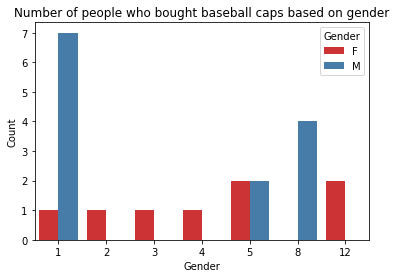

In [15]:
ax=sns.countplot(data=df,x='Baseball_Caps',hue='Gender',palette='Set1')
ax.set(title='Number of people who bought baseball caps based on gender',xlabel='Baseball caps',ylabel='Count')
plt.show()

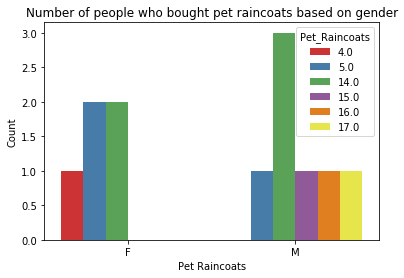

In [17]:
ax=sns.countplot(data=df,hue='Pet_Raincoats',x='Gender',palette='Set1')
ax.set(title='Number of people who bought pet raincoats based on gender',xlabel='Pet Raincoats',ylabel='Count')
plt.show()

City_Category  Metro Cities  Small Towns  Villages
Gender                                            
F                         6            1         1
M                         8            3         2


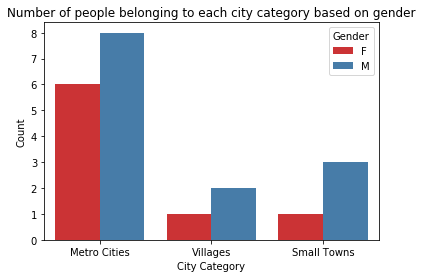

In [22]:
print(pd.crosstab(df['Gender'],df['City_Category']))
ax=sns.countplot(data=df,x='City_Category',hue='Gender',palette='Set1')
ax.set(title='Number of people belonging to each city category based on gender',xlabel='City Category',ylabel='Count')
plt.show()